In [2]:
from __future__ import print_function, division # Make compatible with Python 2

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import sys
sys.path.append("../helpers")
from data_modeling import gen_data, gen_trials

from ipywidgets import interact, interactive, fixed, FloatSlider
import ipywidgets as widgets

import scipy.optimize as optimization

try:
    import mpld3
    mpld3.enable_notebook()
except:
    print("mpld3 not installed, proceeding without zoomable plots")

# Data Modeling

What is data modeling

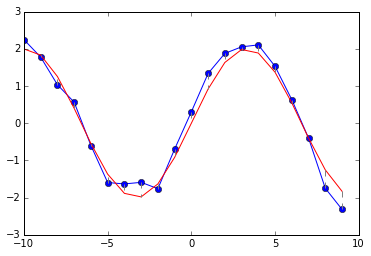

In [9]:
interact(gen_data,model_params = widgets.SelectionSlider(options=[[2],[2,3],[2,3,4]]));

/Users/gabeschamberg/Library/Python/3.4/lib/python/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/gabeschamberg/Library/Python/3.4/lib/python/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


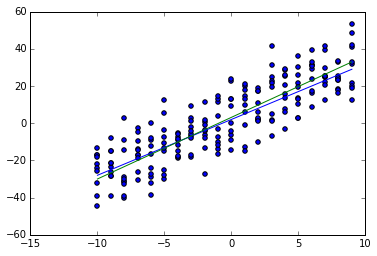

In [4]:
(xs,measurements,signal) = gen_trials(
    model='polynomial',model_params=[2,3],noise='gaussian',noise_param=10,start=-10,stop=10,step=1,N=10)
x = xs[0:len(signal)]
plt.scatter(xs,measurements)
plt.plot(x,signal);

def poly1(x,a,b):
    return a + b*x

[[a,b],err] = optimization.curve_fit(poly1, xs, measurements, [0,0], 1)

plt.plot(np.asarray(x),a*np.asarray(x)+b);